In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
dff = pd.read_csv('COLLATTEDAJIBABANNNN.csv', encoding='ISO-8859-1')
df = dff

In [28]:
df.to_csv("clustered_diets.csv", index=False)


In [6]:
df.fillna(0, inplace=True)
X = df.drop(['index', 'NDB_No', 'Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2'], axis=1).values

In [7]:
df

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,Paleo Eba Swallow with Okra Soup and Snail,86.0,590,3.0,2.0,1.0,8.0,1.6,...,0.0,1.387,5.695,3.147,1.0,73.0,"1 package, (1 NLEA serving)",0.0,0,0.0
1,1,1002,Paleo Eba Swallow with Groundnut Soup and Chicken,74.0,650,8.0,13.0,3.0,74.0,18.1,...,0.0,1.207,2.224,1.839,1.0,45.0,"1 packet, (1 NLEA serving)",0.0,0,0.0
2,2,1003,Paleo Eba Swallow with Spinach and Fish Stew,65.0,620,6.0,5.0,3.0,22.0,5.5,...,0.0,0.300,0.200,1.200,0.0,56.0,"1 Cup, (1 NLEA serving)",0.0,0,0.0
3,3,1004,Paleo Eba Swallow with Palm Nut Soup and Goat ...,38.0,670,6.0,6.0,3.0,47.0,0.0,...,0.0,0.400,1.200,1.000,0.0,58.0,"1.25 cup, (1 NLEA serving)",0.0,0,0.0
4,4,1005,Paleo Eba Swallow with Bitterleaf Soup and Fish,29.0,600,4.0,11.0,1.0,55.0,1.1,...,0.0,0.100,0.100,0.300,0.0,50.0,".75 Cup, (1 NLEA serving)",0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1632,2633,Brown Rice Raw& Guinea Fowl Egg (Boiled Withou...,70.0,649,28.0,4.0,1.0,0.0,0.0,...,0.0,1.193,1.576,0.793,99.0,85.0,3 oz,195.0,1 piece,0.0
1633,1633,2634,Brown Rice (Boiled) & Guinea Fowl Egg (Boiled ...,8.0,422,30.0,3.0,2.0,0.0,0.0,...,0.0,1.012,1.325,0.713,106.0,85.0,3 oz,192.0,1 piece,0.0
1634,1634,2635,Polished Rice Raw& Guinea Fowl Egg (Boiled Wit...,70.0,638,2.0,3.0,2.0,9.0,0.4,...,22.0,0.820,0.750,1.460,4.0,126.0,".5 cup, (4 fl oz)",305.0,"1 can, (10.75 oz)",0.0
1635,1635,2636,"White Rice, Cooked With Tomatoes, Tomato Paste...",13.0,426,5.0,1.0,3.0,15.0,6.8,...,1.8,0.340,0.480,0.410,0.0,257.0,"1 cup, (8 fl oz)",312.0,"1 can, (11 oz), undiluted",0.0


### we will preprocess the dataset and extract the clusters using an Autoencoder

In [8]:
# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Autoencoder
from keras.layers import Input, Dense
from keras.models import Model 

# Set the encoding dimension
encoding_dim = 3

# Input layer
input_layer = Input(shape=(X.shape[1],))

# Encoder layers
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder layers
decoder = Dense(X.shape[1], activation='softmax')(encoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.0928 - loss: 0.0227 - val_accuracy: 0.0457 - val_loss: 0.0235
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0981 - loss: 0.0229 - val_accuracy: 0.0427 - val_loss: 0.0228
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1221 - loss: 0.0212 - val_accuracy: 0.0427 - val_loss: 0.0206
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0941 - loss: 0.0182 - val_accuracy: 0.3933 - val_loss: 0.0192
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5162 - loss: 0.0150 - val_accuracy: 0.3933 - val_loss: 0.0184
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5077 - loss: 0.0141 - val_accuracy: 0.5305 - val_loss: 0.0175
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6203 - loss: 0.0133 - val_accuracy: 0.5976 - val_loss: 0.0167
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6937 - loss: 0.0126 - val_accuracy: 0.6524 - val_los

### After training the autoencoder, we can extract the encoded features:

In [9]:
# Extract encoded features
encoder = Model(inputs=input_layer, outputs=encoder)
encoded_features = encoder.predict(X_scaled)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


### Now, we can apply K-means clustering to group the samples into three clusters:

In [10]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(encoded_features)
clusters = kmeans.predict(encoded_features)

high_caloric = encoded_features[clusters == 0]
mid_caloric = encoded_features[clusters == 1]
low_caloric = encoded_features[clusters == 2]
df['cluster'] = clusters

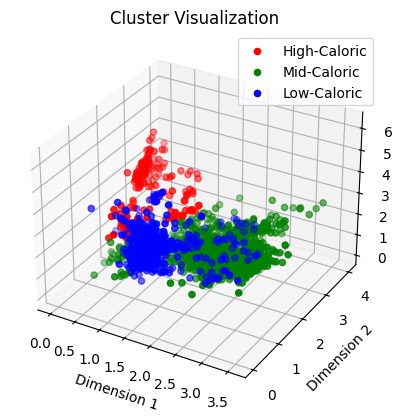

In [11]:
# Visualize the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the high-caloric food cluster
ax.scatter(high_caloric[:, 0], high_caloric[:, 1], high_caloric[:, 2], c='r', label='High-Caloric')

# Plot the mid-caloric food cluster
ax.scatter(mid_caloric[:, 0], mid_caloric[:, 1], mid_caloric[:, 2], c='g', label='Mid-Caloric')

# Plot the low-caloric food cluster
ax.scatter(low_caloric[:, 0], low_caloric[:, 1], low_caloric[:, 2], c='b', label='Low-Caloric')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

ax.legend()
plt.title('Cluster Visualization')
plt.show()

In [12]:
encoded_features

array([[2.9317336, 2.1480427, 2.0745637],
       [3.1327884, 1.0486313, 3.6670175],
       [2.5306554, 1.4548358, 2.943086 ],
       ...,
       [2.7031705, 1.9600594, 2.2851603],
       [1.7962625, 0.8622816, 2.037246 ],
       [2.4608252, 1.8197005, 1.4849322]], dtype=float32)

### Next, we can generate the right food diets using Particle Swarm Optimization (PSO) for the CNN model:

In [13]:
pip install pyswarms

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
   -------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pyswarms as ps

In [15]:
X = X
y = df['cluster'].values
from sklearn.svm import LinearSVC
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def calculate_fitness(position, X, y):
    selected_features = position >= 0.5
    print('Shape of selected_features:', selected_features.shape)
    X_selected = X[:, selected_features.shape[0]]
    clf = LinearSVC()
    score = np.mean(cross_val_score(clf, X_selected.reshape(-1,1), y, cv=5))
    return score

def pso_feature_selection(X, y, num_particles, num_iterations):
    num_features = X.shape[1]
    options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
    dimensions = num_features

    optimizer = ps.single.GlobalBestPSO(n_particles=num_particles, dimensions=dimensions, options=options)

    cost, pos = optimizer.optimize(calculate_fitness, iters=num_iterations, X=X, y=y)

    selected_features = pos >= 0.5
    X_selected = X[:, selected_features]

    return X_selected

num_particles = encoded_features.shape[1]  # Update num_particles to match the number of features
X_selected = pso_feature_selection(X, y, num_particles=num_particles, num_iterations=20)

2025-06-28 20:07:32,065 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|                                                                                |0/20

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  10%|██████▎                                                        |2/20, best_cost=0.702

Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)


pyswarms.single.global_best:  30%|██████████████████▉                                            |6/20, best_cost=0.702

Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)


pyswarms.single.global_best:  40%|█████████████████████████▏                                     |8/20, best_cost=0.702

Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)


pyswarms.single.global_best:  60%|█████████████████████████████████████▏                        |12/20, best_cost=0.702

Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)


pyswarms.single.global_best:  70%|███████████████████████████████████████████▍                  |14/20, best_cost=0.702

Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)


pyswarms.single.global_best:  80%|█████████████████████████████████████████████████▌            |16/20, best_cost=0.702

Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)


pyswarms.single.global_best:  90%|███████████████████████████████████████████████████████▊      |18/20, best_cost=0.702

Shape of selected_features: (3, 49)
Shape of selected_features: (3, 49)


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|20/20, best_cost=0.702
2025-06-28 20:07:34,192 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7018963974043411, best pos: [0.22735277 0.72539238 0.91996253 0.93097259 0.02484303 0.58551085
 0.42197099 0.80018924 0.40840647 0.48035784 0.64224815 0.13035974
 0.87858226 0.70446576 0.70471237 0.78537827 0.54472416 0.18848805
 0.58549047 0.26640965 0.2299429  0.03935604 0.4426522  0.32754356
 0.32856546 0.54131831 0.51860545 0.91919447 0.76968923 0.27428348
 0.97718537 0.58104463 0.24945849 0.1641262  0.5727819  0.9183194
 0.86135168 0.1573802  0.25432233 0.41009541 0.8640664  0.07419299
 0.58477379 0.31450198 0.76632098 0.01712084 0.16174223 0.50733582
 0.60700318]


Shape of selected_features: (3, 49)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Reshape the data for compatibility with CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
y.shape

(1637,)

In [18]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical

# Train the CNN model
# ...

# Encode target labels as one-hot vectors
num_classes = 3
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Build the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.5037 - loss: 40.4467 - val_accuracy: 0.7317 - val_loss: 5.9982
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7336 - loss: 17.3396 - val_accuracy: 0.7378 - val_loss: 4.7069
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7124 - loss: 6.9199 - val_accuracy: 0.7226 - val_loss: 2.0980
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7909 - loss: 2.5483 - val_accuracy: 0.7530 - val_loss: 2.4365
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8121 - loss: 2.6709 - val_accuracy: 0.7957 - val_loss: 2.8257
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7719 - loss: 3.1225 - val_accuracy: 0.7591 - val_loss: 1.8965
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8230 - loss: 1.4791 - val_accuracy: 0.7195 - val_loss: 1.3566
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8447 - loss: 0.8309 - val_accuracy: 0.8262 -

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluate the model on the test data
from keras.utils import to_categorical

# Encode target labels as one-hot vectors
num_classes = 3
y_test_encoded = to_categorical(y_test, num_classes)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8489 - loss: 0.9182
Test Accuracy: 0.8354


In [20]:
y_pred = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_selected)
best_clusters = kmeans.predict(X_selected)
df['cluster1'] = best_clusters
high_caloric1 = df[best_clusters == 0]
mid_caloric1 = df[best_clusters == 1]
low_caloric1 = df[best_clusters == 2]

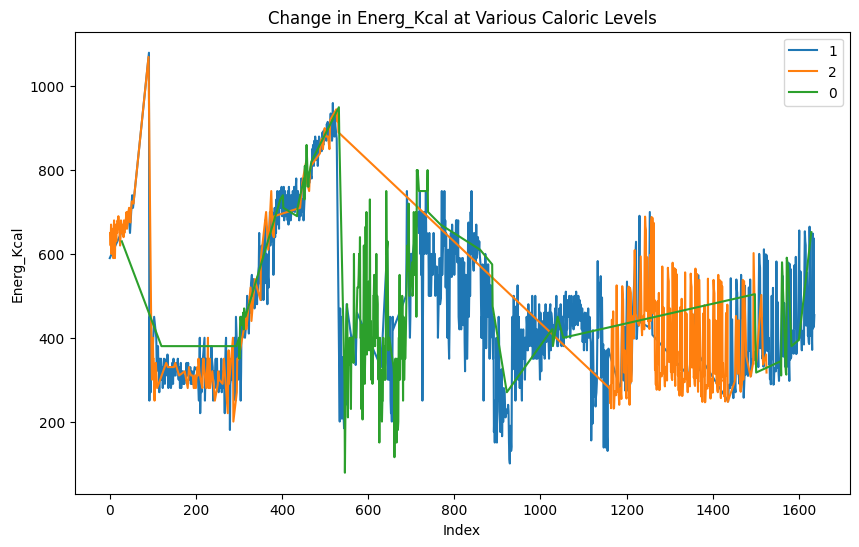

In [22]:
import matplotlib.pyplot as plt

# Select the columns of interest
columns_to_visualize = ['Energ_Kcal', 'cluster']

# Get the subset of the DataFrame for the selected columns
subset = df[columns_to_visualize]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line plot
for caloric_level in subset['cluster'].unique():
    level_data = subset[subset['cluster'] == caloric_level]
    plt.plot(level_data.index, level_data['Energ_Kcal'], label=caloric_level)

plt.xlabel('Index')
plt.ylabel('Energ_Kcal')
plt.title('Change in Energ_Kcal at Various Caloric Levels')
plt.legend()

# Show the plot
plt.show()

### Recommendation system

In [23]:
def recommend_diets(caloric_level,caloric_value , n=10):
    # Filter the dataset based on the caloric level
    filtered_data = df[df['cluster'] == caloric_level]

    # Sort the diets based on some criteria (e.g., nutrients)
    sorted_diets = filtered_data.sort_values(by=['Energ_Kcal'], ascending=False)

    # Return the top n recommended diets
    dff = sorted_diets
    recommended_diets = dff[(dff['Energ_Kcal'] >= caloric_value) & (df['Energ_Kcal'] <= caloric_value + 10)]

    return recommended_diets.head(n)

# Example usage:
top_10_diets_low_calorie = recommend_diets('low', 120,  n=10)
top_10_diets_mid_calorie = recommend_diets('mid', 300, n=10)
top_10_diets_high_calorie = recommend_diets('high', 800, n=10)

### Code for pregnancy woman input

In [35]:
def nutrients(age, height, weight, preg_stage, active):
    if active == 'Sedentary':
        active = 1.2
    elif active == "Light Active":
        active = 1.375
    elif active == "Moderately Active":
        active = 1.55
    elif active == "Very Active":
        active = 1.75

    bmi = weight / (height * height)
    if bmi < 18.5:
        person = 'Underweight'
        if preg_stage == "FirstTrimester":
            goal = 2
        elif preg_stage == "SecondTrimester":
            goal = 10
        elif preg_stage == "ThirdTrimester":
            goal = 18
    elif bmi >= 18.5 and bmi <= 25:
        person = 'Health in Weight'
        if preg_stage == "FirstTrimester":
            goal = 2
        elif preg_stage == "SecondTrimester":
            goal = 10
        elif preg_stage == "ThirdTrimester":
            goal = 16
    elif bmi > 25:
        person = 'Overweight'
        if preg_stage == "FirstTrimester":
            goal = 2
        elif preg_stage == "SecondTrimester":
            goal = 7
        elif preg_stage == "ThirdTrimester":
            goal = 11

    # Mifflin-St Jeor BMR equation to get the BMR formula
    bmr = 10 * weight + 6.25 * height - 5 * age - 161

    # Needed calories = BMR multiplied by the activity level
    caloric_intake = bmr * float(active)

    return caloric_intake

def classify_caloric_intake(caloric_intake):
    if caloric_intake < 300:
        classification = "low"
    elif caloric_intake >= 300 and caloric_intake <= 350:
        classification = "mid"
    else:
        classification = "high"

    return classification

# Collect user input
age = int(input("Enter your age in years: "))
height = float(input("Enter your height in meters: "))
weight = float(input("Enter your weight in kilograms: "))
preg_stage = input("Enter your pregnancy stage (FirstTrimester, SecondTrimester, ThirdTrimester): ")
active = input("Enter your activity level (Sedentary, Light Active, Moderately Active, Very Active): ")

# Calculate caloric intake
caloric_intake = nutrients(age, height, weight, preg_stage, active)

# Classify caloric intake
caloric_classification = classify_caloric_intake(caloric_intake)

# Display the result
print("Your recommended caloric intake is:", caloric_intake, "calories per day.")
print("Caloric Intake Classification:", caloric_classification)
result = recommend_diets(caloric_classification, caloric_intake, n=5)
print(result[['Shrt_Desc', 'Energ_Kcal']].to_string(index=False))

Enter your age in years:  40
Enter your height in meters:  1.27
Enter your weight in kilograms:  55
Enter your pregnancy stage (FirstTrimester, SecondTrimester, ThirdTrimester):  SecondTrimester
Enter your activity level (Sedentary, Light Active, Moderately Active, Very Active):  Light Active


Your recommended caloric intake is: 270.7890625 calories per day.
Caloric Intake Classification: low
Empty DataFrame
Columns: [Shrt_Desc, Energ_Kcal]
Index: []


In [36]:
top_10_diets = df[df['Energ_Kcal'] < caloric_intake + 100].sort_values(by=['Energ_Kcal'], ascending=False).head(10)
print(round(caloric_intake, 2), "calories recommended per day")
top_10_diets[["Shrt_Desc", "Energ_Kcal"]]

270.79 calories recommended per day


,Shrt_Desc,Energ_Kcal
1607,Sundried Yam (Cooked into paste) & Guinea Fowl...,370
970,Baked butternut squash with groundnut-free sauce,370
1101,Yam and avocado egg salad,370
1108,Yam and spiced coconut crumbled,370
647,Chicken fried rice 1cup,370
1154,"Cornmeal, Degermed, Unenriched, White",370
602,"Yogurt, soaked almond seeds, mango smoothie",370
1377,Ripe Roasted Plantain & Fresh Quail Egg,370
984,Zobo-poached chicken breast with carrot slaw,370
983,Spiced turkey gizzard with cabbage-carrot slaw,370


In [29]:
df.to_csv("clustered_diets.csv", index=False)
